In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Small size data.
Data loading and initial correlation matrix.

In [2]:
data = pd.read_excel('small.xlsx', index_col=0, sheet_name='original')
cols = data.columns

In [ ]:
print(data)

               6 HOMEWARES  17 FURNITURE  18 DECORATOR  19 LAUNDRY  \
6 HOMEWARES     100.000000     45.926237     90.821649   81.703110   
17 FURNITURE     45.926237    100.000000     27.883173   45.798964   
18 DECORATOR     90.821649     27.883173    100.000000   57.051419   
19 LAUNDRY       81.703110     45.798964     57.051419  100.000000   
20 KITCHEN       92.899931     24.802801     88.744981   67.353601   
21 STORAGE       87.008555     52.163676     66.018241   83.183564   
22 MANCHESTER    40.077203     54.770495     23.213005   48.224125   
23 APPLIANCES    55.089194     -3.498805     55.292542   26.953722   

               20 KITCHEN  21 STORAGE  22 MANCHESTER  23 APPLIANCES  
6 HOMEWARES     92.899931   87.008555      40.077203      55.089194  
17 FURNITURE    24.802801   52.163676      54.770495      -3.498805  
18 DECORATOR    88.744981   66.018241      23.213005      55.292542  
19 LAUNDRY      67.353601   83.183564      48.224125      26.953722  
20 KITCHEN     100.

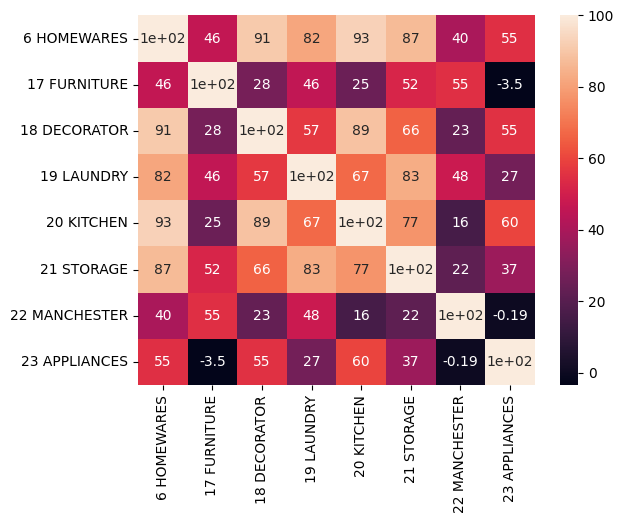

In [ ]:
sn.heatmap(data, annot=True)
plt.show()

In [ ]:
data_array = np.array(data)

# Function for correlation matrix sorting.

In [ ]:
def sorting_l1(data_array):
  n = data_array.shape[0]
  sums = data_array.sum(axis=0)
  sums_order = sums.argsort()
  ind= list(range(n))

  data_sorted = np.empty_like(data_array)
  data_sorted[np.ix_(ind,ind)] = data_array[np.ix_(sums_order,sums_order)]
  return data_sorted, sums_order


In [ ]:
def sorting_l2(data_array):
  n = data_array.shape[0]
  sums = np.sqrt(np.sum(data_array**2, axis=0))
  sums_order = sums.argsort()
  ind= list(range(n))

  data_sorted = np.empty_like(data_array)
  data_sorted[np.ix_(ind,ind)] = data_array[np.ix_(sums_order,sums_order)]
  return data_sorted, sums_order

In [ ]:
def sorting_l3(data_array):
  n = data_array.shape[0]
  sums = np.cbrt(np.sum(data_array**3, axis=0))
  sums_order = sums.argsort()
  ind= list(range(n))

  data_sorted = np.empty_like(data_array)
  data_sorted[np.ix_(ind,ind)] = data_array[np.ix_(sums_order,sums_order)]
  return data_sorted, sums_order

### Transformation of numpy array to Dataframe.

In [ ]:
def transforn_to_df(data, order, cols):
  cols = np.array(cols)[order]
  df = pd.DataFrame(data, columns=cols, index=cols)
  return df

### Creation of Excel file.

In [ ]:
def file_xlsx(data):
  df = pd.DataFrame(data)
  filepath = 'data_sorted.xlsx'
  return df.to_excel(filepath, index=True)

## Application of functions to small data.

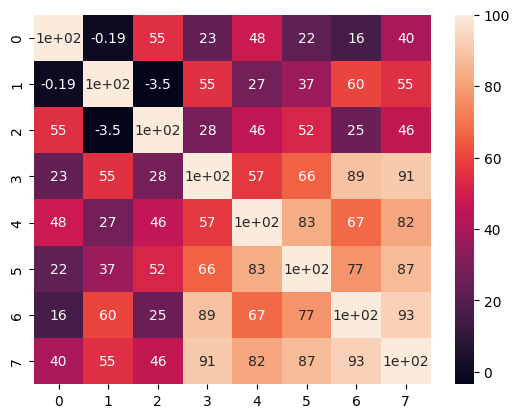

In [ ]:
data_sorted, sums_order = sorting_l1(data_array)
df = transforn_to_df(data_sorted, sums_order, cols)
file_xlsx(df)
sn.heatmap(data_sorted, annot=True)
plt.show()

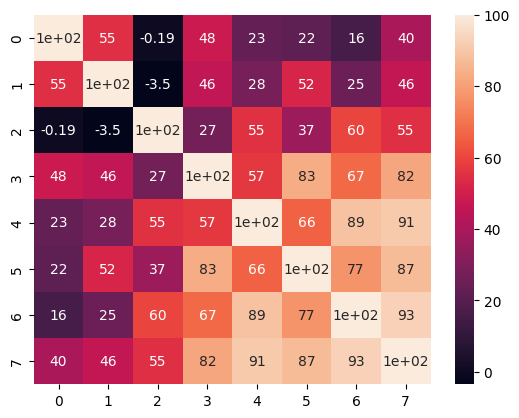

In [ ]:
data_sorted, sums_order = sorting_l2(data_array)
df = transforn_to_df(data_sorted, sums_order, cols)
file_xlsx(df)
sn.heatmap(data_sorted, annot=True)
plt.show()

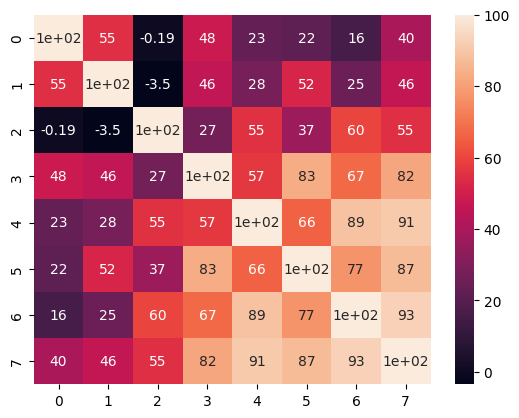

In [ ]:
data_sorted, sums_order = sorting_l3(data_array)
sn.heatmap(data_sorted, annot=True)
plt.show()

## Medium size data.

In [3]:
data_medium = pd.read_excel('medium.xlsx', index_col=0, sheet_name='original')
data_medium_array = np.array(data_medium)
data_medium.shape

(40, 40)

In [4]:
data_medium = data_medium.dropna(axis = 0, how = 'all')
data_medium = data_medium.dropna(axis = 1, how = 'all')
data_medium.shape

(37, 37)

In [ ]:
nan_ind = np.nonzero(np.isnan(data_medium_array).all(axis=1))[0]
data_medium_array = np.delete(data_medium_array, nan_ind, axis=0)
data_medium_array = np.delete(data_medium_array, nan_ind, axis=1)
print(data_medium_array.shape)

(37, 37)


In [ ]:
data_sorted, sums_order = sorting_l1(data_medium_array)
data_medium2 = data_medium.drop(data_medium.columns[nan_ind], axis=1)
cols_medium = data_medium2.columns
df = transforn_to_df(data_sorted, sums_order, cols_medium)
file_xlsx(df)

NameError: ignored

In [ ]:
data_sorted, sums_order = sorting_l2(data_medium_array)
data_medium2 = data_medium.drop(data_medium.columns[nan_ind], axis=1)
cols_medium = data_medium2.columns
df = transforn_to_df(data_sorted, sums_order, cols_medium)
file_xlsx(df)

In [ ]:
data_sorted, sums_order = sorting_l3(data_medium_array)
data_medium2 = data_medium.drop(data_medium.columns[nan_ind], axis=1)
cols_medium = data_medium2.columns
df = transforn_to_df(data_sorted, sums_order, cols_medium)
file_xlsx(df)

# Big data.

In [6]:
data_big = pd.read_excel('big.xlsx', index_col=0, sheet_name='original')
data_big_array = np.array(data_big)
data_big.shape

(1009, 1009)

In [7]:
data_big = data_big.dropna(axis = 0, how = 'all')
data_big = data_big.dropna(axis = 1, how = 'all')
data_big.shape

(931, 931)

In [ ]:
nan_ind = np.nonzero(np.isnan(data_big_array).all(axis=1))[0]
data_big_array = np.delete(data_big_array, nan_ind, axis=0)
data_big_array = np.delete(data_big_array, nan_ind, axis=1)
print(data_big_array.shape)

(931, 931)


In [ ]:
data_sorted, sums_order = sorting_l1(data_big_array)
data_big2 = data_big.drop(data_big.columns[nan_ind], axis=1)
cols_big = data_big2.columns
df = transforn_to_df(data_sorted, sums_order, cols_big)
file_xlsx(df)


In [ ]:
data_sorted, sums_order = sorting_l2(data_big_array)
data_big2 = data_big.drop(data_big.columns[nan_ind], axis=1)
cols_big = data_big2.columns
df = transforn_to_df(data_sorted, sums_order, cols_big)
file_xlsx(df)

In [ ]:
data_sorted, sums_order = sorting_l3(data_big_array)
data_big2 = data_big.drop(data_big.columns[nan_ind], axis=1)
cols_big = data_big2.columns
df = transforn_to_df(data_sorted, sums_order, cols_big)
file_xlsx(df)

# Clustering.

In [8]:
import scipy.cluster.hierarchy as spc

In [10]:
def sorting_clustering (data, method, font):
  linkage = spc.linkage(data, method=f'{method}')
  index = spc.fcluster(linkage, 0.8, 'distance') #0.5 * data.max()
  index_order = np.argsort(index)
  for idx, i in enumerate(data.columns[index_order]):
    if idx == 0:
        sorted = pd.DataFrame(data[i])
    else:
        df_to_append = pd.DataFrame(data[i])
        sorted = pd.concat([sorted, df_to_append], axis=1)
  correlations = sorted.corr()
  plt.figure(figsize=(10,7))
  sn.heatmap(correlations, annot=True, annot_kws={"size": font}, vmin=-1, vmax=1)
  return correlations

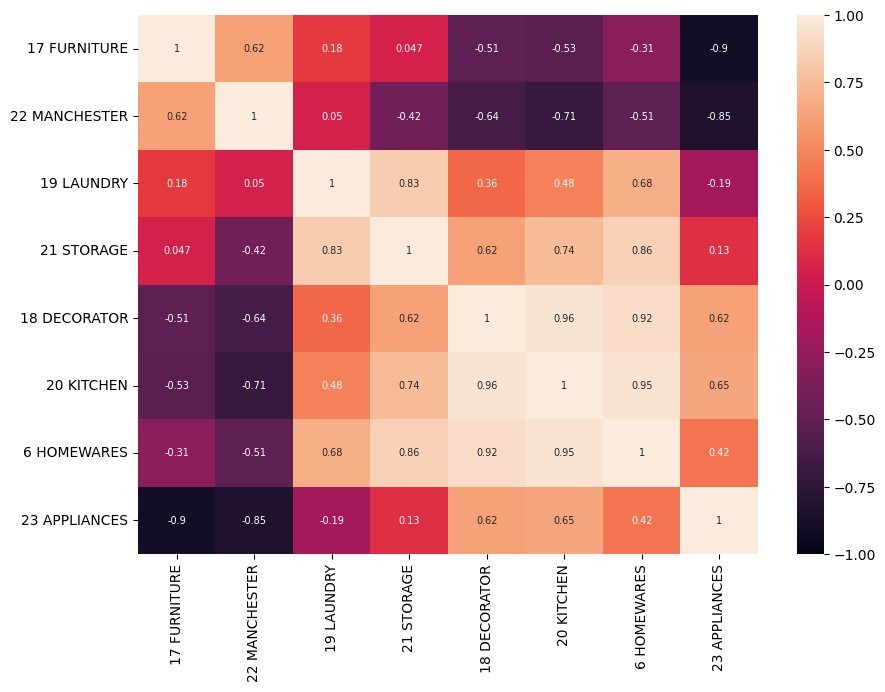

In [11]:
a = sorting_clustering(data, 'complete', 7) #the same for distance=['ward', 'weighted']

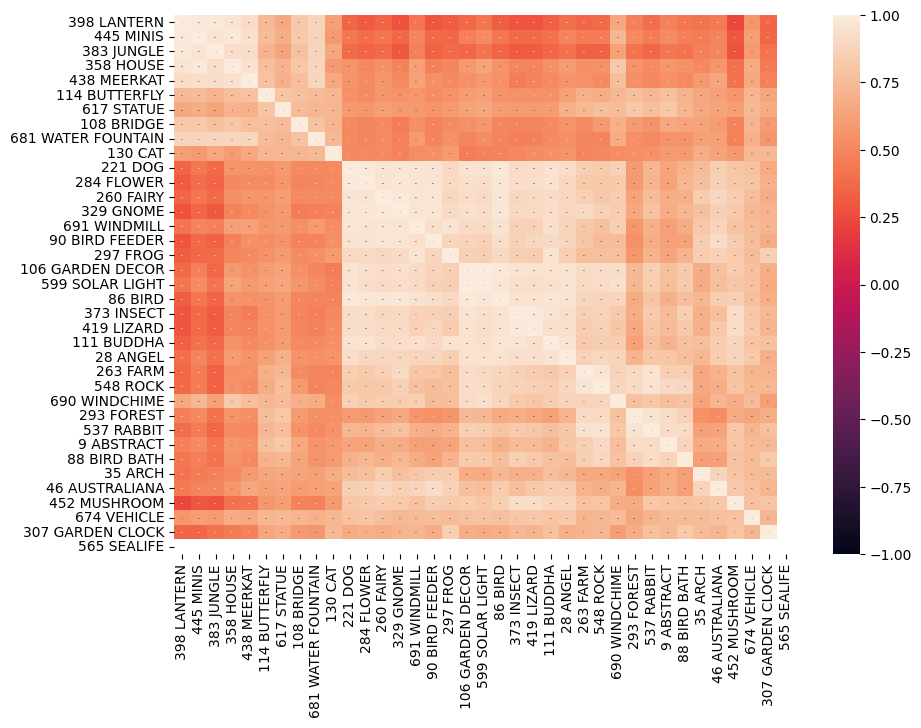

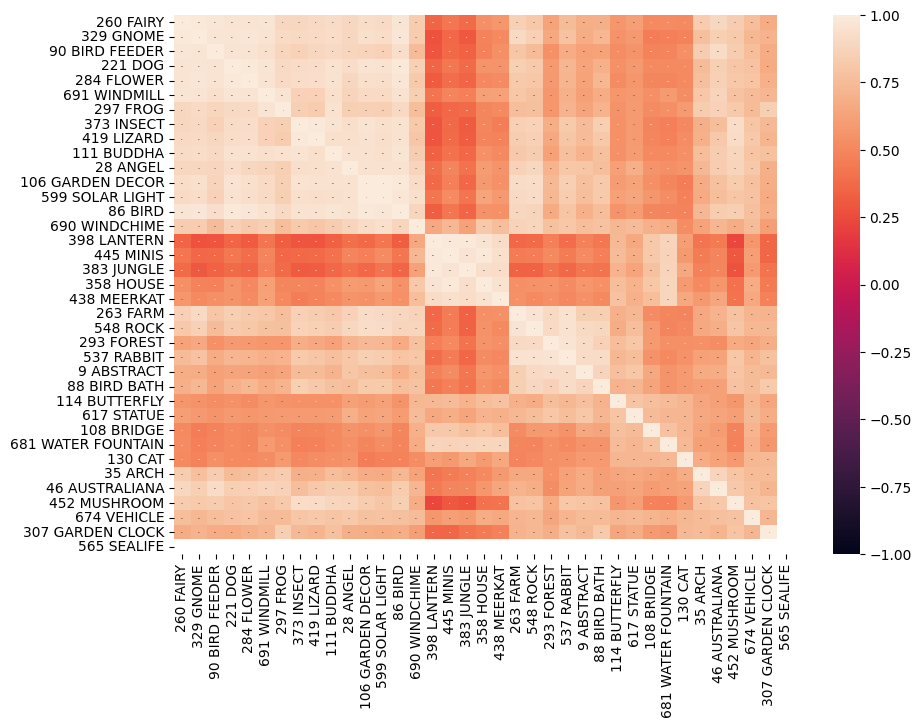

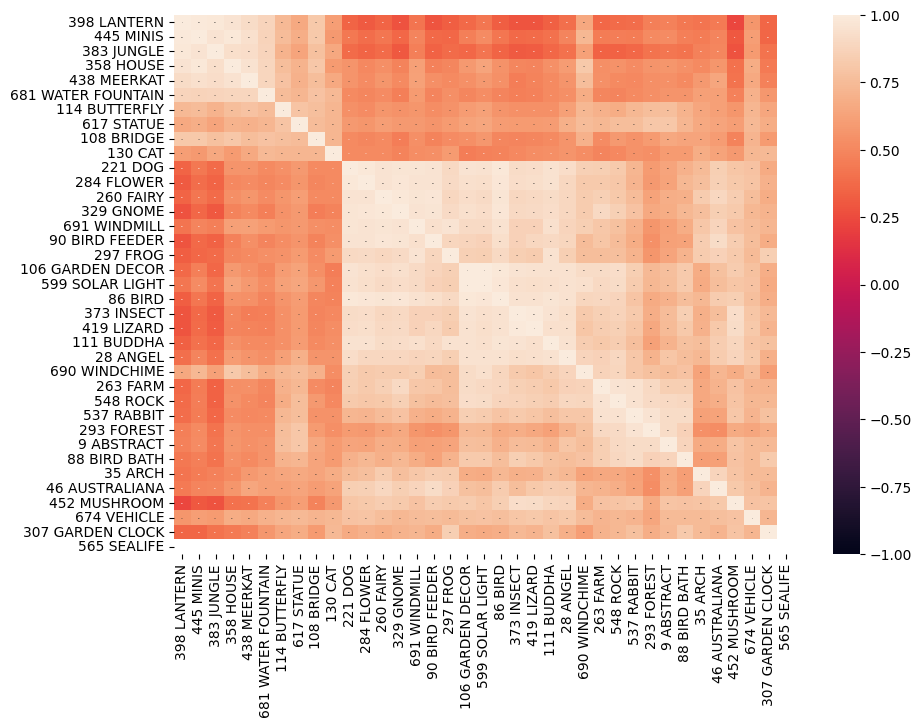

In [14]:
b = sorting_clustering(data_medium, 'complete', 0)
c = sorting_clustering(data_medium, 'ward', 0)
d = sorting_clustering(data_medium, 'weighted', 0)

In [16]:
filepath = 'data_sorted.xlsx'
b.to_excel(filepath, index=True)

In [17]:
filepath = 'data_sorted.xlsx'
c.to_excel(filepath, index=True)

In [18]:
filepath = 'data_sorted.xlsx'
d.to_excel(filepath, index=True)

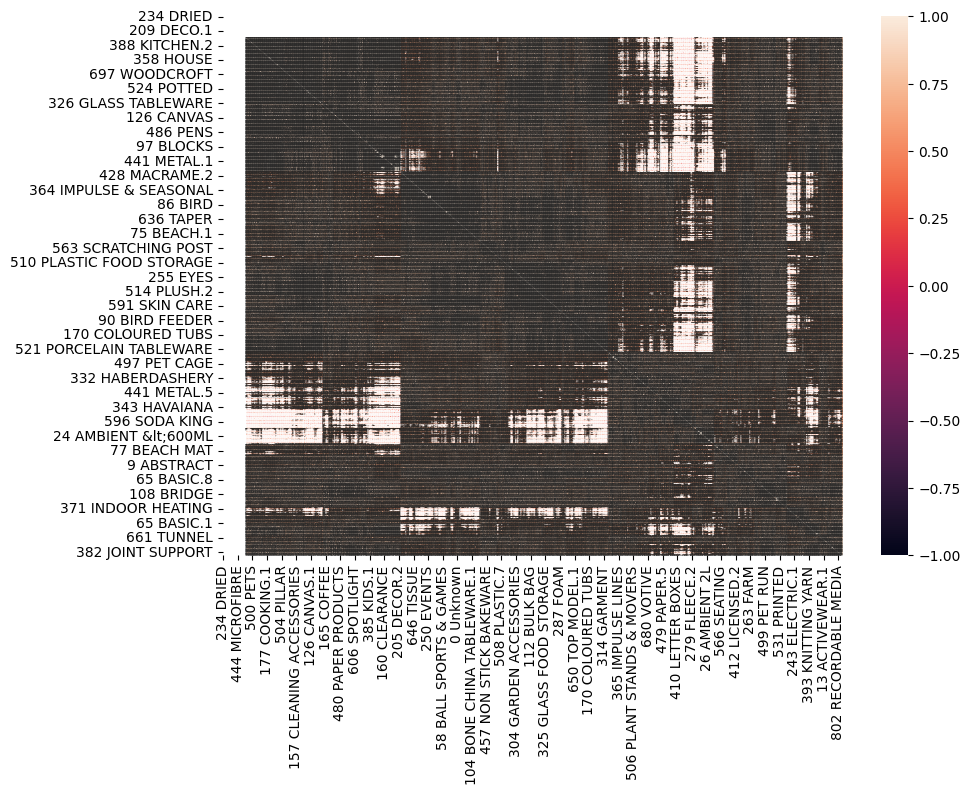

In [20]:
e = sorting_clustering(data_big, 'complete', 0)

In [23]:
filepath = 'data_sorted.xlsx'
e.to_excel(filepath, index=True)

In [ ]:
f = sorting_clustering(data_big, 'ward')
g = sorting_clustering(data_big, 'weighted')